In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("train.csv", index_col="PassengerId")

print(train.shape)

(891, 11)


In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv("test.csv", index_col="PassengerId")

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Preprocessing

### Encode Sex

In [6]:
train["Sex_encode"] = train["Sex"].replace("male", 0).replace("female", 1)


print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [7]:
test["Sex_encode"] = test["Sex"].replace("male", 0).replace("female", 1)


print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


### Encode Embarked

In [8]:
# C ==0, S ==1, Q ==2
# 2 * S = Q ?
# C + S = S ?

# One Hot Encoding
# True == 1 , False == 0
# C =[ 1, 0, 0]
# S =[ 0, 1, 0]
# Q =[ 0, 0, 1]

# C =[ True, False, False]
# S =[ False, True, False]
# Q =[ False, False, True]

train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)
train[["Embarked","Embarked_C","Embarked_S","Embarked_Q"]].head(20)

(891, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False
6,Q,False,False,True
7,S,False,True,False
8,S,False,True,False
9,S,False,True,False


In [9]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked","Embarked_C","Embarked_S","Embarked_Q"]].head(20)

(418, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False
897,S,False,True,False
898,Q,False,False,True
899,S,False,True,False
900,C,True,False,False


### Encode Age

In [10]:
train.loc[train["Age"] < 15, "AgeType_Y"] = "Y"

train.loc[train["Age"] >= 30 , "AgeType_O"] = "O"

train.loc[(train["Age"] >=15) & (train["Age"] <30) , "AgeType_M"] = "M"

train["AgeType_Y"] = train["Age"] < 15
train["AgeType_O"] = train["Age"] >=30
train["AgeType_M"] = (train["Age"] >=15) & (train["Age"] <30)

print(train.shape)
train[["Age","AgeType_Y","AgeType_O","AgeType_M"]].head(20)

(891, 18)


,Age,AgeType_Y,AgeType_O,AgeType_M
PassengerId,,,,
1,22.0,False,False,True
2,38.0,False,True,False
3,26.0,False,False,True
4,35.0,False,True,False
5,35.0,False,True,False
6,NaN,False,False,False
7,54.0,False,True,False
8,2.0,True,False,False
9,27.0,False,False,True


In [11]:
test.loc[test["Age"] < 15, "AgeType_Y"] = "Y"

test.loc[test["Age"] >= 30 , "AgeType_O"] = "O"

test.loc[(test["Age"] >=15) & (test["Age"] <30) , "AgeType_M"] = "M"

test["AgeType_Y"] = test["Age"] < 15
test["AgeType_O"] = test["Age"] >=30
test["AgeType_M"] = (test["Age"] >=15) & (test["Age"] <30)

print(test.shape)
test[["Age","AgeType_Y","AgeType_O","AgeType_M"]].head(20)

(418, 17)


,Age,AgeType_Y,AgeType_O,AgeType_M
PassengerId,,,,
892,34.5,False,True,False
893,47.0,False,True,False
894,62.0,False,True,False
895,27.0,False,False,True
896,22.0,False,False,True
897,14.0,True,False,False
898,30.0,False,True,False
899,26.0,False,False,True
900,18.0,False,False,True


### Encode Family Size

In [12]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

train.loc[train["FamilySize"] == 1, "FamilyType_S"] = "S"
train.loc[(train["FamilySize"] >= 2) & (train["FamilySize"] < 5), "FamilyType_N"] = "N"
train.loc[train["FamilySize"] >= 5, "FamilyType_B"] = "B"

train["FamilyType_S"] = train["FamilySize"] == 1
train["FamilyType_N"] = (train["FamilySize"] >= 2) & (train["FamilySize"] < 5)
train["FamilyType_B"] = train["FamilySize"] >= 5

train[["FamilySize","FamilyType_S","FamilyType_N","FamilyType_B"]].head(20)

,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


In [13]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

test.loc[test["FamilySize"] == 1, "FamilyType_S"] = "S"
test.loc[(test["FamilySize"] >= 2) & (test["FamilySize"] < 5), "FamilyType_N"] = "N"
test.loc[test["FamilySize"] >= 5, "FamilyType_B"] = "B"

test["FamilyType_S"] = test["FamilySize"] == 1
test["FamilyType_N"] = (test["FamilySize"] >= 2) & (test["FamilySize"] < 5)
test["FamilyType_B"] = test["FamilySize"] >= 5

test[["FamilySize","FamilyType_S","FamilyType_N","FamilyType_B"]].head(20)

,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False
897,1,True,False,False
898,1,True,False,False
899,3,False,True,False
900,1,True,False,False


# Encode Name

In [14]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_C,Embarked_S,Embarked_Q,AgeType_Y,AgeType_O,AgeType_M,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,True,False,False,False,True,2,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,True,False,False,False,True,False,2,False,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,True,False,False,False,True,1,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,False,True,False,False,True,False,2,False,True,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,False,True,False,False,True,False,1,True,False,False


In [15]:
def get_title(name):
    
    return name.split(", ")[1].split('. ')[0]

train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [16]:
train.loc[train["Name"].str.contains("Mr"), "name_title"] = "Mr"
train.loc[train["Name"].str.contains("Mrs"), "name_title"] = "Mrs"
train.loc[train["Name"].str.contains("Miss"), "name_title"] = "Miss"
train.loc[train["Name"].str.contains("Master"), "name_title"] = "Master"
train.loc[train["Name"].str.contains("Don"), "name_title"] = "Don"
train.loc[train["Name"].str.contains("Rev"), "name_title"] = "Rev"
train.loc[train["Name"].str.contains("Dr"), "name_title"] = "Dr"
train.loc[train["Name"].str.contains("Mme"), "name_title"] = "Mme"
train.loc[train["Name"].str.contains("Ms"), "name_title"] = "Ms"
train.loc[train["Name"].str.contains("Major"), "name_title"] = "Major"
train.loc[train["Name"].str.contains("Lady"), "name_title"] = "Lady"
train.loc[train["Name"].str.contains("Sir"), "name_title"] = "Sir"
train.loc[train["Name"].str.contains("Mlle"), "name_title"] = "Mlle"
train.loc[train["Name"].str.contains("Col"), "name_title"] = "Col"
train.loc[train["Name"].str.contains("Capt"), "name_title"] = "Capt"
train.loc[train["Name"].str.contains("the Countess"), "name_title"] = "the Countess"
train.loc[train["Name"].str.contains("Jonkheer"), "name_title"] = "Jonkheer"

print(train.shape)
train.head()

(891, 23)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_S,Embarked_Q,AgeType_Y,AgeType_O,AgeType_M,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B,name_title
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,True,False,False,False,True,2,False,True,False,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,True,False,2,False,True,False,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,True,False,False,False,True,1,True,False,False,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,True,False,False,True,False,2,False,True,False,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,True,False,False,True,False,1,True,False,False,Mr


In [29]:
df_nametitle = pd.DataFrame(train["name_title"].value_counts()).reset_index()
print(train["name_title"].value_counts())

Mr              506
Miss            180
Mrs             123
Master           40
Dr               11
Col              10
Rev               6
Sir               3
Mlle              2
Major             2
Don               2
Ms                1
Jonkheer          1
Mme               1
Capt              1
the Countess      1
Lady              1
Name: name_title, dtype: int64


In [30]:
df_nametitle

,index,name_title
0,Mr,506
1,Miss,180
2,Mrs,123
3,Master,40
4,Dr,11
5,Col,10
6,Rev,6
7,Sir,3
8,Mlle,2
9,Major,2


In [46]:
df_nametitle['name_title'].iloc[0]

506

In [41]:
df_nametitle['name_title'].sum()

891

In [49]:
for i in df_nametitle.index:
    df_nametitle['rate(%)'].iloc[i] = df_nametitle['name_title'].iloc[i] / df_nametitle['name_title'].sum()

C:\Users\Johns\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
df_nametitle.rename({'index':'title'}, axis=1)

,title,name_title,rate(%)
0,Mr,506,0.567901
1,Miss,180,0.202020
2,Mrs,123,0.138047
3,Master,40,0.044893
4,Dr,11,0.012346
5,Col,10,0.011223
6,Rev,6,0.006734
7,Sir,3,0.003367
8,Mlle,2,0.002245
9,Major,2,0.002245


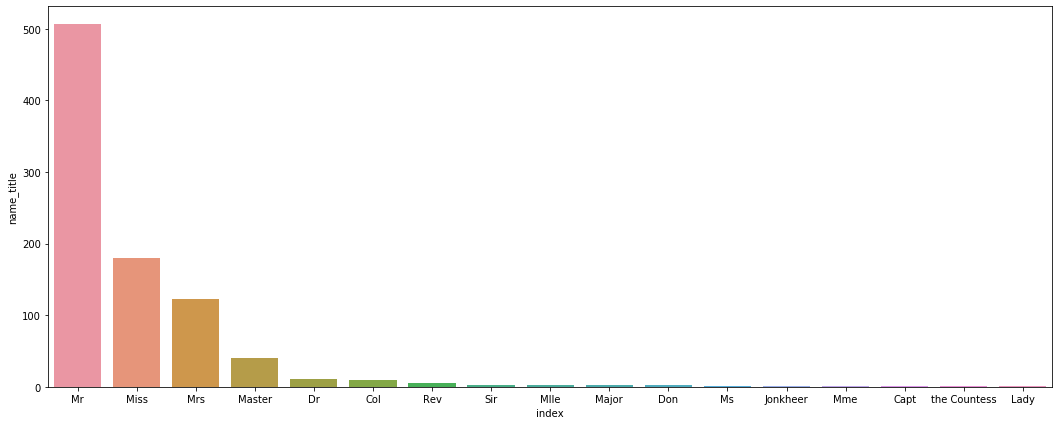

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,7))
sns.barplot(data=df_nametitle, x="index", y="name_title")

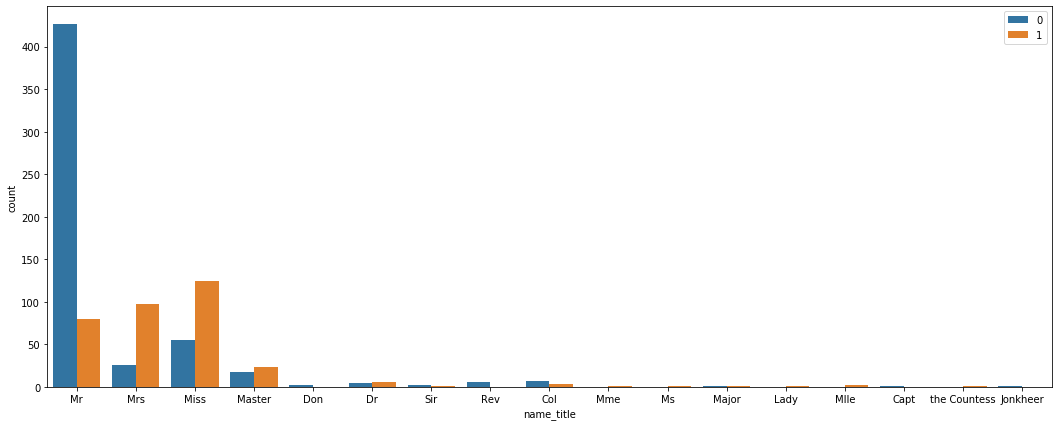

In [56]:
plt.figure(figsize = ( 18, 7))
sns.countplot(data=train, x="name_title", hue="Survived")
plt.legend(loc='upper right')

In [69]:
df = train.pivot_table(index='name_title', values='Survived', aggfunc=['count', 'mean'])
df

,count,mean
,Survived,Survived
name_title,,
Capt,1,0.000000
Col,10,0.300000
Don,2,0.000000
Dr,11,0.545455
Jonkheer,1,0.000000
Lady,1,1.000000
Major,2,0.500000
Master,40,0.575000


In [76]:
df.columns = ['count', 'rate(%)']

In [78]:
df.sort_values(by='count', ascending=False)

,count,rate(%)
name_title,,
Mr,506,0.158103
Miss,180,0.694444
Mrs,123,0.788618
Master,40,0.575000
Dr,11,0.545455
Col,10,0.300000
Rev,6,0.000000
Sir,3,0.333333
Don,2,0.000000


- Mr, Mrs, Miss, Master 까지는 features로 추가해도 괜찮지 않을까? 한번 돌려보자.

In [20]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Embarked_C,Embarked_S,Embarked_Q,AgeType_Y,AgeType_O,AgeType_M,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,False,False,True,False,True,False,1,True,False,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,False,True,False,False,True,False,2,False,True,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,False,False,True,False,True,False,1,True,False,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,False,True,False,False,False,True,1,True,False,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,False,True,False,False,False,True,3,False,True,False


In [21]:
def get_title(name):
    
    return name.split(", ")[1].split('. ')[0]

test["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [22]:
test.loc[test["Name"].str.contains("Mr"), "name_title"] = "Mr"
test.loc[test["Name"].str.contains("Mrs"), "name_title"] = "Mrs"
test.loc[test["Name"].str.contains("Miss"), "name_title"] = "Miss"
test.loc[test["Name"].str.contains("Master"), "name_title"] = "Master"
test.loc[test["Name"].str.contains("Ms"), "name_title"] = "Ms"
test.loc[test["Name"].str.contains("Col"), "name_title"] = "Col"
test.loc[test["Name"].str.contains("Rev"), "name_title"] = "Rev"
test.loc[test["Name"].str.contains("Dr"), "name_title"] = "Dr"
test.loc[test["Name"].str.contains("Dona"), "name_title"] = "Dona"

print(test.shape)
test.head()

(418, 22)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Embarked_S,Embarked_Q,AgeType_Y,AgeType_O,AgeType_M,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B,name_title
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,False,True,False,True,False,1,True,False,False,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,True,False,False,True,False,2,False,True,False,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,False,True,False,True,False,1,True,False,False,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,True,False,False,False,True,1,True,False,False,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,True,False,False,False,True,3,False,True,False,Mrs


In [23]:
df_nametitle = pd.DataFrame(test["name_title"].value_counts()).reset_index()
print(test["name_title"].value_counts())

Mr        236
Miss       77
Mrs        69
Master     20
Dr          6
Col         5
Dona        2
Rev         2
Ms          1
Name: name_title, dtype: int64


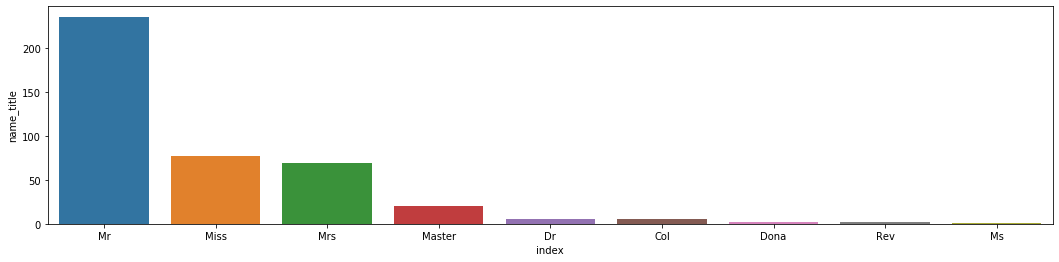

In [24]:
plt.figure(figsize= (18, 4))
sns.barplot(data=df_nametitle, x="index", y="name_title")

- test에서는 Mr, Miss, Mrs, Master 까지 4가지가 있고, 여기까지만 features로 활용해보록 하자

In [25]:
train["name_Mr"] = train["name_title"] == "Mr"
train["name_Miss"] = train["name_title"] == "Miss"
train["name_Mrs"] = train["name_title"] == "Mrs"
train["name_Master"] = train["name_title"] == "Master"

print(train.shape)
train.head()

(891, 27)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeType_M,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B,name_title,name_Mr,name_Miss,name_Mrs,name_Master
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,True,2,False,True,False,Mr,True,False,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,2,False,True,False,Mrs,False,False,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,True,1,True,False,False,Miss,False,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,False,2,False,True,False,Mrs,False,False,True,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,False,1,True,False,False,Mr,True,False,False,False


In [26]:
test["name_Mr"] = test["name_title"] == "Mr"
test["name_Miss"] = test["name_title"] == "Miss"
test["name_Mrs"] = test["name_title"] == "Mrs"
test["name_Master"] = test["name_title"] == "Master"

print(test.shape)
test.head()

(418, 26)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,AgeType_M,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B,name_title,name_Mr,name_Miss,name_Mrs,name_Master
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,False,1,True,False,False,Mr,True,False,False,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,False,2,False,True,False,Mrs,False,False,True,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,False,1,True,False,False,Mr,True,False,False,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,True,1,True,False,False,Mr,True,False,False,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,True,3,False,True,False,Mrs,False,False,True,False


### Fill in missing Fare

In [27]:
test["Fare"] = test["Fare"].fillna(0)

test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,AgeType_M,FamilySize,FamilyType_S,FamilyType_N,FamilyType_B,name_title,name_Mr,name_Miss,name_Mrs,name_Master
PassengerId,,,,,,,,,,,,,,,,,,,,,


## Train

In [27]:
# Feature : Pclass, Sex, Fare, ...
# Lable : Survived

In [28]:
feature_names = ["Pclass","Sex_encode","Fare",
                 "Embarked_C","Embarked_S","Embarked_Q",
                 "AgeType_Y","AgeType_O",
                 "FamilyType_S","FamilyType_N","FamilyType_B",
                 "name_Master"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'AgeType_Y',
 'AgeType_O',
 'FamilyType_S',
 'FamilyType_N',
 'FamilyType_B',
 'name_Master']

In [29]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 12)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_S,Embarked_Q,AgeType_Y,AgeType_O,FamilyType_S,FamilyType_N,FamilyType_B,name_Master
PassengerId,,,,,,,,,,,,
1,3,0,7.2500,False,True,False,False,False,False,True,False,False
2,1,1,71.2833,True,False,False,False,True,False,True,False,False
3,3,1,7.9250,False,True,False,False,False,True,False,False,False
4,1,1,53.1000,False,True,False,False,True,False,True,False,False
5,3,0,8.0500,False,True,False,False,True,True,False,False,False


In [30]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 12)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_S,Embarked_Q,AgeType_Y,AgeType_O,FamilyType_S,FamilyType_N,FamilyType_B,name_Master
PassengerId,,,,,,,,,,,,
892,3,0,7.8292,False,False,True,False,True,True,False,False,False
893,3,1,7.0000,False,True,False,False,True,False,True,False,False
894,2,0,9.6875,False,False,True,False,True,True,False,False,False
895,3,0,8.6625,False,True,False,False,False,True,False,False,False
896,3,1,12.2875,False,True,False,False,False,False,True,False,False


In [31]:
lable_name = "Survived"

y_train = train[lable_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

## Evaluate Score

**1. accuracy score**

In [32]:
from sklearn.metrics import accuracy_score
import numpy as np

# y_pred = [0, 2, 1, 3]
# y_true = [0, 2, 1, 3]

# score = accuracy_score(y_true, y_pred, normalize=True)

# score

In [49]:
# score method
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score


#train
true_x_train = train[feature_names]
true_y_train = train["Survived"]
#true_x_test = test[feature_names]

#modeling
model = DecisionTreeClassifier(max_depth = 10, random_state = 88)

#fit
model.fit(true_x_train, true_y_train)

#predict
Pred_y = model.predict(true_x_train)
  
Pred_y[0:5]

a_score = accuracy_score(true_y_train, Pred_y, normalize=True)

print(f"accuracy_scroe = {a_score}")

b_a_score = balanced_accuracy_score(true_y_train, Pred_y, adjusted=False)

print(f"balanced_accuray_score = {b_a_score}")

accuracy_scroe = 0.8956228956228957
balanced_accuray_score = 0.8723037100949094


In [50]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred, adjusted=False)

0.625

### Use Decision Tress

In [51]:
# scikit-learn == sklearn

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 8
                               , random_state = 88)

### Use RandomForestClassifier

In [52]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators = 3000,
#                                n_jobs = -1,
#                                random_state = 88)

# model

In [53]:
# 1) fit(train) -> 2) predict(test)

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=88, splitter='best')

In [54]:
prediction = model.predict(X_test)

print(prediction.shape)

prediction[0:5]

(418,)


array([0, 1, 0, 0, 1], dtype=int64)

## Submit

In [55]:
submit = pd.read_csv("gender_submission.csv", index_col="PassengerId")

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [56]:
submit["Survived"] = prediction

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [57]:
submit.to_csv("Titanic_DecisionTreeClassifier.csv")